<a href="https://colab.research.google.com/github/elhamkashi/DSPS_EKashi/blob/main/HW2/Bayesian_posteriors.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

**TASK 1**

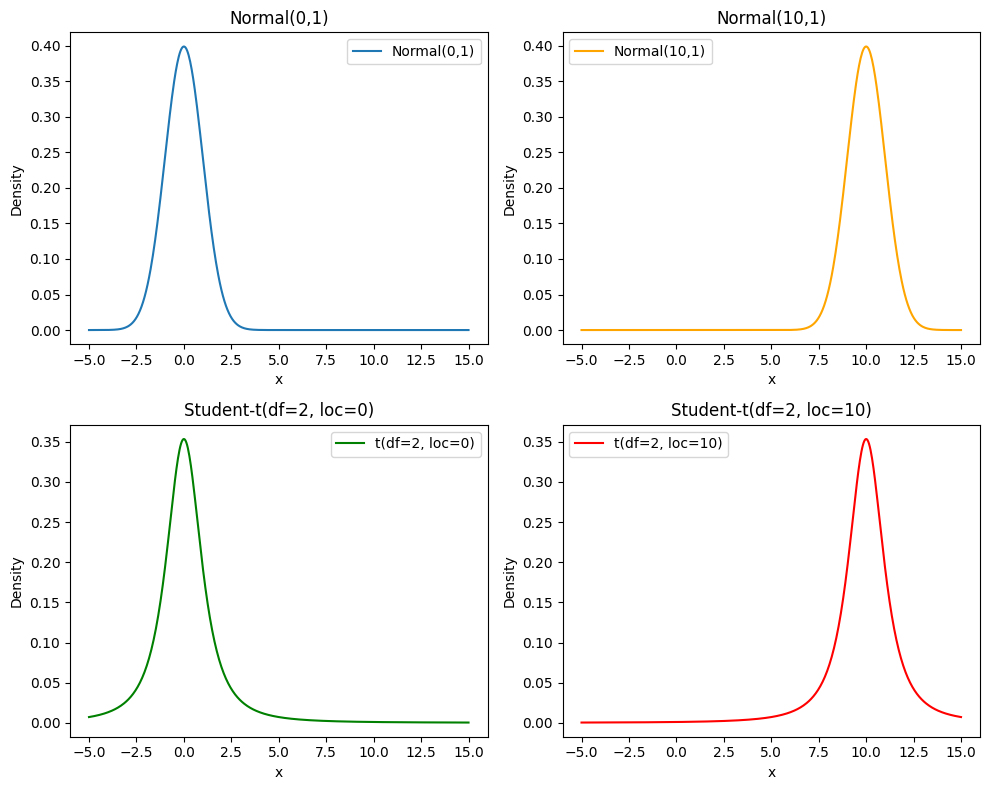

In [2]:

# Task 1 : generate and plot the four given distributions


# x range
x = np.linspace(-5, 15, 500)

# distributions
Norm_0 = stats.norm.pdf(x, loc=0, scale=1)          # N(0,1) loc= mean
Norm_10 = stats.norm.pdf(x, loc=10, scale=1)        # N(10,1)
tStudent_0 = stats.t.pdf(x, df=2, loc=0)            # t(2,0)   loc=center
tStudent_10 = stats.t.pdf(x, df=2, loc=10)          # t(2,10)

# create 2x2 grid of subplots
fig, axs = plt.subplots(2, 2, figsize=(10, 8))

# top-left: Normal(0,1)
axs[0, 0].plot(x, Norm_0, label="Normal(0,1)")
axs[0, 0].set_title("Normal(0,1)")
axs[0, 0].set_xlabel("x")
axs[0, 0].set_ylabel("Density")
axs[0, 0].legend()

# top-right: Normal(10,1)
axs[0, 1].plot(x, Norm_10, color="orange", label="Normal(10,1)")
axs[0, 1].set_title("Normal(10,1)")
axs[0, 1].set_xlabel("x")
axs[0, 1].set_ylabel("Density")
axs[0, 1].legend()

# bottom-left: t(df=2, loc=0) loc=center
axs[1, 0].plot(x, tStudent_0, color="green", label="t(df=2, loc=0)")
axs[1, 0].set_title("Student-t(df=2, loc=0)")
axs[1, 0].set_xlabel("x")
axs[1, 0].set_ylabel("Density")
axs[1, 0].legend()

# bottom-right: t(df=2, loc=10)
axs[1, 1].plot(x, tStudent_10, color="red", label="t(df=2, loc=10)")
axs[1, 1].set_title("Student-t(df=2, loc=10)")
axs[1, 1].set_xlabel("x")
axs[1, 1].set_ylabel("Density")
axs[1, 1].legend()

plt.tight_layout()
plt.show()


**TASK 2**

In [3]:
# Task 2: define posterior function (no caption argument)
def posterior(prior, likelihood):
    # normalize prior and likelihood to peak at 1
    normalized_prior = prior / np.max(prior)
    normalized_likelihood = likelihood / np.max(likelihood)

    # posterior (element-wise product, normalized)
    this_posterior = normalized_prior * normalized_likelihood
    this_posterior /= np.max(this_posterior)

    # plot
    plt.figure(figsize=(8,5))
    plt.plot(x, normalized_prior, 'k--', label="Prior")
    plt.plot(x, normalized_likelihood, 'k-', label="Likelihood")
    plt.plot(x, this_posterior, 'r-', label="Posterior")
    plt.xlabel("x")
    plt.ylabel("Normalized Density")
    plt.title("Prior, Likelihood, and Posterior")
    plt.legend()
    plt.show()


**TASK 3**

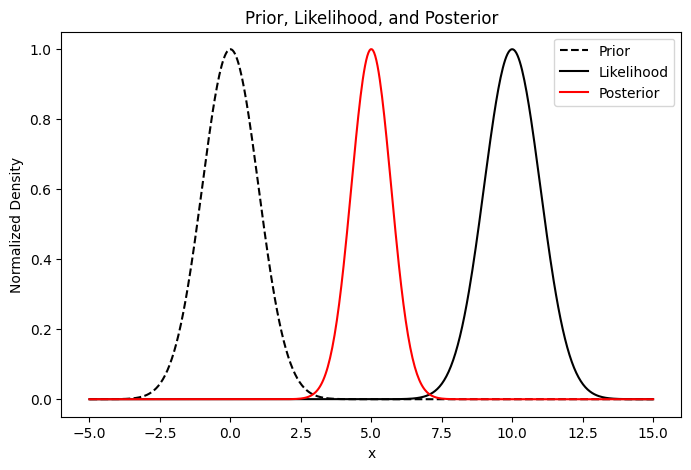

CAPTION:
WHAT: Prior is Normal(0,1), likelihood is Normal(10,1). Posterior is a compromise and  peaks in between and seems a bit narrower.
WHY: The prior and likelihood barely overlap (their means are distant) — only their tails intersect, making the  posterior.
WOW: The posterior demonstrates Bayesian updating -data  evidence (likelihood) far from the prior shifts the outcome from prior dramatically.
WOW: The cost of conflict is uncertainty! Two strong, contradictory beliefs don't create a strong new opinion—they destroy certainty.


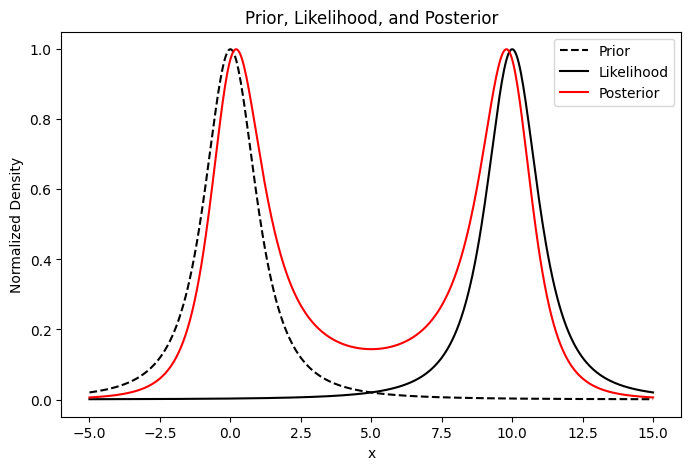

CAPTION:
WHAT: Prior is t(2,0), likelihood is t(2,10). Posterior reflects the heavy tails and shows overlap between the two.
WHY: The heavy tails of the distributions make their respective centers (0 and 10) seem more plausible to each other. The posterior does not form a simple compromise but maintains two separate areas of high probability.
WOW: Even with distant centers, heavy tails have broad overlap and  posterior doesn’t collapse into a sharp spike (as in Normal–Normal).


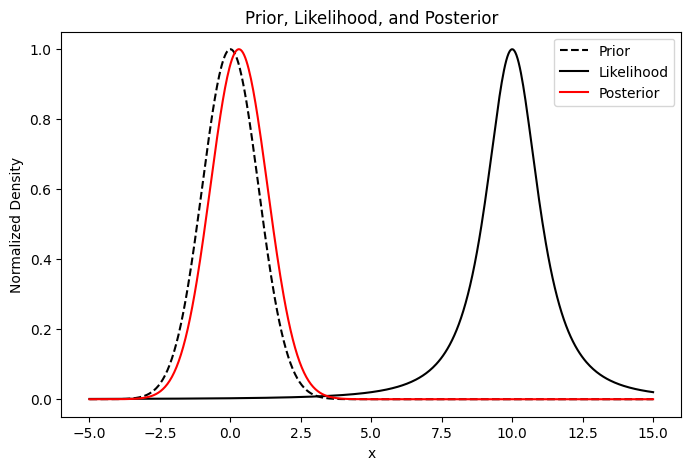

CAPTION:
WHAT: Prior is Normal(0,1), likelihood is t(2,10). Posterior is nearly zero since overlap is very small.
WHY: Demonstrates conflict between a sharply peaked prior and a broad  likelihood, normal distribution with greater precision (1/variance) has more influence.
WOW: A highly informative prior distribution can effectively reject noisy data that contradicts it, demonstrating the power of strong initial information .


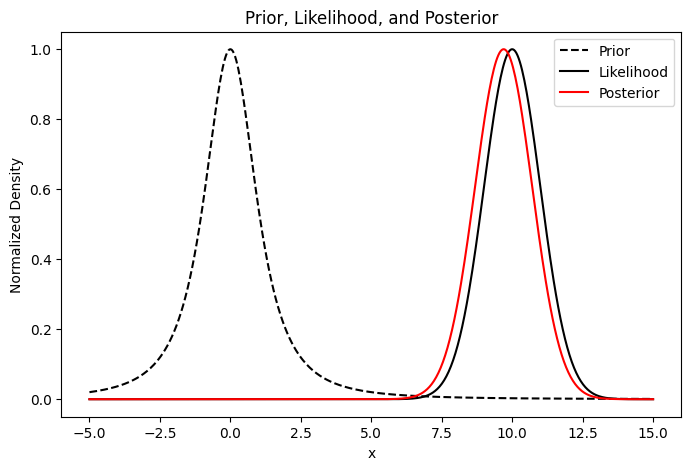

CAPTION:
WHAT: Prior is t(2,0), likelihood is Normal(10,1). Posterior is  pulled strongly toward 10.
WHY: A precise likelihood distribution easily dominates an imprecise prior distribution.
WOW: Precise data can completely overwhelm a weak prior, showing that strong evidence dictates the final posterior distribution.


In [4]:
#Task 3: call posterior + print caption

# Normal-Normal
posterior(Norm_0, Norm_10)
print("CAPTION:")
print("WHAT: Prior is Normal(0,1), likelihood is Normal(10,1). Posterior is a compromise and  peaks in between and seems a bit narrower.")
print("WHY: The prior and likelihood barely overlap (their means are distant) — only their tails intersect, making the  posterior.")
print("WOW: The posterior demonstrates Bayesian updating -data  evidence (likelihood) far from the prior shifts the outcome from prior dramatically.")
print("WOW: The cost of conflict is uncertainty! Two strong, contradictory beliefs don't create a strong new opinion—they destroy certainty.")
print("="*100)

# t-t
posterior(tStudent_0, tStudent_10)
print("CAPTION:")
print("WHAT: Prior is t(2,0), likelihood is t(2,10). Posterior reflects the heavy tails and shows overlap between the two.")
print("WHY: The heavy tails of the distributions make their respective centers (0 and 10) seem more plausible to each other. The posterior does not form a simple compromise but maintains two separate areas of high probability.")
print("WOW: Even with distant centers, heavy tails have broad overlap and  posterior doesn’t collapse into a sharp spike (as in Normal–Normal).")
print("="*100)

# Normal-t
posterior(Norm_0, tStudent_10)
print("CAPTION:")
print("WHAT: Prior is Normal(0,1), likelihood is t(2,10). Posterior is nearly zero since overlap is very small.")
print("WHY: Demonstrates conflict between a sharply peaked prior and a broad  likelihood, normal distribution with greater precision (1/variance) has more influence.")
print("WOW: A highly informative prior distribution can effectively reject noisy data that contradicts it, demonstrating the power of strong initial information .")
print("="*100)

# t-Normal
posterior(tStudent_0, Norm_10)
print("CAPTION:")
print("WHAT: Prior is t(2,0), likelihood is Normal(10,1). Posterior is  pulled strongly toward 10.")
print("WHY: A precise likelihood distribution easily dominates an imprecise prior distribution.")
print("WOW: Precise data can completely overwhelm a weak prior, showing that strong evidence dictates the final posterior distribution.")
print("="*100)


How I did this homework?

First, I checked the tweeterlink and read the posted materials, then ask an AI-tool  (deepseek) to explain the purspose of comparison.


For writing the codes, I used the chatgpt , for example in task1, it produced  a  2×2 grid of subplots, while I had first made 4 different cells , each for a plot!

Captions: I used  AI tools to produce the captions, especially the WOW part!
I first  assumed  there was a misspelling and WOW should be HOW! but then  figured out WOW is correct and it shows important results from Bayesian theorem.

